# Atividade 04 de ICD - Text Mining
---
### Professor: Diego Souza
### Aluno: Nabson Paiva

In [2]:
import numpy as np
import pandas as pd
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [4]:
base = pd.read_csv("bebidas.csv",encoding='utf-8')
base.drop('Unnamed: 0',axis=1,inplace=True)
base.columns = ['Nome']

base.head()

,Nome
0,ÁGUA MINERAL NATURAL SEM GÁS CRYSTAL GARRAFA 5...
1,ÁGUA MINERAL NATURAL COM GÁS CRYSTAL GARRAFA 5...
2,ÁGUA MINERAL NATURAL SEM GÁS BONAFONT 500ML
3,"ÁGUA MINERAL NATURAL SEM GÁS CRYSTAL GARRAFA 1,5L"
4,NESTLÉ AQUAREL SEM GÁS GARRAFA


In [5]:
# Elimina assentuações
base.Nome = base.Nome.apply(str).apply(unidecode)
base.head()

,Nome
0,AGUA MINERAL NATURAL SEM GAS CRYSTAL GARRAFA 5...
1,AGUA MINERAL NATURAL COM GAS CRYSTAL GARRAFA 5...
2,AGUA MINERAL NATURAL SEM GAS BONAFONT 500ML
3,"AGUA MINERAL NATURAL SEM GAS CRYSTAL GARRAFA 1,5L"
4,NESTLE AQUAREL SEM GAS GARRAFA


## Definições sobre a base

Os **termos** são todas as palavras e símbolos que ocorrem, como 'AGUA', 'NATURAL', 'SEM', 'GAS' etc.

Os **documentos** são cada no de produto das páginas, correspondentes às linhas de base.

## Gerando Vocabulário

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nabson/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
termos = base.apply(lambda x: word_tokenize(str(x)))[0]

In [18]:
termos

['0',
 'AGUA',
 'MINERAL',
 'NATURAL',
 'SEM',
 'GAS',
 'CRYSTAL',
 'GARRAFA',
 '5',
 '...',
 '1',
 'AGUA',
 'MINERAL',
 'NATURAL',
 'COM',
 'GAS',
 'CRYSTAL',
 'GARRAFA',
 '5',
 '...',
 '2',
 'AGUA',
 'MINERAL',
 'NATURAL',
 'SEM',
 'GAS',
 'BONAFONT',
 '500ML',
 '3',
 'AGUA',
 'MINERAL',
 'NATURAL',
 'SEM',
 'GAS',
 'CRYSTAL',
 'GARRAFA',
 '1,5L',
 '4',
 'NESTLE',
 'AQUAREL',
 'SEM',
 'GAS',
 'GARRAFA',
 '5',
 'AGUA',
 'MINERAL',
 'AQUISSIMA',
 '1',
 '6',
 'COCA-COLA',
 'GARRAFA',
 'PET',
 '2',
 'L',
 '7',
 'SCHIN',
 'COM',
 'GAS',
 'GARRAFA',
 '8',
 'NESTLE',
 'AQUAREL',
 'SEM',
 'GAS',
 'GARRAFA',
 '9',
 'AGUA',
 'MINERAL',
 'SEM',
 'GAS',
 'COPO',
 '310ML',
 'CRYSTAL',
 '10',
 'SCHIN',
 'SEM',
 'GAS',
 'GARRAFA',
 '11',
 'BONAFONT',
 'SEM',
 'GAS',
 'GARRAFA',
 '12',
 'FANTA',
 'LARANJA',
 'GARRAFA',
 'PET',
 '13',
 'INDAIA',
 'SEM',
 'GAS',
 'GARRAFA',
 '14',
 'MINALBA',
 'PET',
 '||AGUA',
 '15',
 'CRYSTAL',
 'COM',
 'GAS',
 'GARRAFA',
 '16',
 'MINALBA',
 'SEM',
 'GAS',
 'GARRAFA

In [30]:
def vocabulary(termos):
    dic = {}
    for t in termos:
        dic[t] = 1
    return list(dic.keys())

In [31]:
vocabulary = vocabulary(termos)

In [32]:
vocabulary

['0',
 'AGUA',
 'MINERAL',
 'NATURAL',
 'SEM',
 'GAS',
 'CRYSTAL',
 'GARRAFA',
 '5',
 '...',
 '1',
 'COM',
 '2',
 'BONAFONT',
 '500ML',
 '3',
 '1,5L',
 '4',
 'NESTLE',
 'AQUAREL',
 'AQUISSIMA',
 '6',
 'COCA-COLA',
 'PET',
 'L',
 '7',
 'SCHIN',
 '8',
 '9',
 'COPO',
 '310ML',
 '10',
 '11',
 '12',
 'FANTA',
 'LARANJA',
 '13',
 'INDAIA',
 '14',
 'MINALBA',
 '||AGUA',
 '15',
 '16',
 '17',
 '18',
 'C/G+AME-S',
 'INDAI+AME-',
 '+AC0-',
 '19',
 'PUREZA',
 'VITAL',
 '510ML',
 '20',
 'EVIAN',
 '21',
 '22',
 'MIN.BONAFONT',
 'MASCOTE',
 '23',
 'AME-GUA',
 'G+AME-S',
 '24',
 '1L',
 '25',
 '26',
 'CRISTAL',
 'GOLD',
 'S/GAS',
 '27',
 '28',
 'PERRIER',
 '29',
 'UVA',
 '4633',
 'CERVEJA',
 'APA',
 'SCHORNSTEIN',
 '4634',
 'KIT',
 'CERV',
 'ORIGINAL',
 '600ML',
 'C/2',
 'COPOS',
 '4635',
 'OPA',
 'BIER',
 'SGA',
 '4636',
 'ITA',
 'GO',
 'DRAFT',
 'LNECK',
 '355ML',
 'PCT',
 'C12',
 '4637',
 'RAVACHE',
 'MUNICH',
 'LONG',
 'NECK',
 '4638',
 'PRIME',
 'KOLSCH',
 'LN',
 '4639',
 'ANT',
 'BOCK',
 '300',
 

## Procurando por Stop-Words

In [33]:
stop_words = []
for i in range(len(vocabulary)):
    if (vocabulary[i].isdigit() or len(vocabulary[i]) < 3 or (not vocabulary[i].isalpha)
        or vocabulary[i].find('|')!=-1 or vocabulary[i] == 'LTDA' or vocabulary[i].find('...')!=-1):
        stop_words.append(vocabulary[i])
        
for i in range(len(stop_words)):
    vocabulary.remove(stop_words[i])

In [34]:
stop_words

['0',
 '5',
 '...',
 '1',
 '2',
 '3',
 '4',
 '6',
 'L',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '||AGUA',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '1L',
 '25',
 '26',
 '27',
 '28',
 '29',
 '4633',
 '4634',
 '4635',
 '4636',
 'GO',
 '4637',
 '4638',
 'LN',
 '4639',
 '300',
 'ML',
 '4640',
 '4641',
 '4642',
 '-',
 '4643',
 '4644',
 'PM',
 '4645',
 '4646',
 '500',
 'OW',
 '4647',
 '4648',
 '4649',
 '4650',
 '4651',
 '4652',
 '4653',
 '4654',
 '4655',
 'P',
 'EX',
 '4656',
 '4657',
 '4658',
 '4659',
 '4660',
 "'S",
 '4661',
 '4662',
 '1824',
 ':',
 ',',
 '4663']

In [35]:
vocabulary

['AGUA',
 'MINERAL',
 'NATURAL',
 'SEM',
 'GAS',
 'CRYSTAL',
 'GARRAFA',
 'COM',
 'BONAFONT',
 '500ML',
 '1,5L',
 'NESTLE',
 'AQUAREL',
 'AQUISSIMA',
 'COCA-COLA',
 'PET',
 'SCHIN',
 'COPO',
 '310ML',
 'FANTA',
 'LARANJA',
 'INDAIA',
 'MINALBA',
 'C/G+AME-S',
 'INDAI+AME-',
 '+AC0-',
 'PUREZA',
 'VITAL',
 '510ML',
 'EVIAN',
 'MIN.BONAFONT',
 'MASCOTE',
 'AME-GUA',
 'G+AME-S',
 'CRISTAL',
 'GOLD',
 'S/GAS',
 'PERRIER',
 'UVA',
 'CERVEJA',
 'APA',
 'SCHORNSTEIN',
 'KIT',
 'CERV',
 'ORIGINAL',
 '600ML',
 'C/2',
 'COPOS',
 'OPA',
 'BIER',
 'SGA',
 'ITA',
 'DRAFT',
 'LNECK',
 '355ML',
 'PCT',
 'C12',
 'RAVACHE',
 'MUNICH',
 'LONG',
 'NECK',
 'PRIME',
 'KOLSCH',
 'ANT',
 'BOCK',
 'COLORADO',
 'ROSALIA',
 'STELLA',
 'ARTOIS',
 '330ML',
 'PRIMATOR',
 'PREMIUM',
 'HERALD',
 'TRADICION',
 'SIX',
 'GIN',
 'TONIC',
 '275ML',
 'BUDWEISER',
 'ESPECIAL',
 'KREMER',
 'IPA',
 'SPRITZ',
 'ANTARCTICA',
 'EXTRA',
 '12X300ML',
 'ROGUE',
 'HOP',
 'SKOL',
 'STRAAT',
 'PILSEN',
 'CERV.ROLETA',
 'RUSSA',
 '350

## Gerando matrizes de termos e frequência

In [36]:
def matriz_tf_simples(docs,vocab):
    m = {}
    t = len(docs)
    for v in vocab:
        m[v] = np.zeros(t)
    for i in range(len(docs)):
        for t in docs.loc[i][0].split():
            if t in vocab:
                m[t][i]+=1
    return pd.DataFrame(m)

In [37]:
matriz_tf_simples(base,vocabulary).head()

,AGUA,MINERAL,NATURAL,SEM,GAS,CRYSTAL,GARRAFA,COM,BONAFONT,500ML,...,NITRO,JUICE,IMIGR.350ML,IMIGRACAO,WEISS+COPO,Name,Nome,Length,dtype,object
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def matriz_tf_bin(docs,vocab):
    m = {}
    t = len(docs)
    for v in vocab:
        m[v] = np.zeros(t)
    for i in range(len(docs)):
        for t in docs.loc[i][0].split():
            if t in vocab:
                m[t][i]=1
    return pd.DataFrame(m)

In [39]:
matriz_tf_bin(base,vocabulary).head()

,AGUA,MINERAL,NATURAL,SEM,GAS,CRYSTAL,GARRAFA,COM,BONAFONT,500ML,...,NITRO,JUICE,IMIGR.350ML,IMIGRACAO,WEISS+COPO,Name,Nome,Length,dtype,object
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def matriz_tf_rel(docs,vocab):
    m = {}
    t = len(docs)
    for v in vocab:
        m[v] = np.zeros(t)
    for i in range(len(docs)):
        for t in docs.loc[i][0].split():
            if t in vocab:
                m[t][i]+=1
    m = pd.DataFrame(m)
    return m/m.sum(axis=0)

In [41]:
matriz_tf_rel(base,vocabulary).head()

,AGUA,MINERAL,NATURAL,SEM,GAS,CRYSTAL,GARRAFA,COM,BONAFONT,500ML,...,NITRO,JUICE,IMIGR.350ML,IMIGRACAO,WEISS+COPO,Name,Nome,Length,dtype,object
0,0.000873,0.001241,0.011905,0.005102,0.00277,0.01,0.002398,0.000000,0.00000,0.002392,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,0.000873,0.001241,0.011905,0.000000,0.00277,0.01,0.002398,0.009346,0.00000,0.002392,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,0.000873,0.001241,0.011905,0.005102,0.00277,0.00,0.000000,0.000000,0.02381,0.002392,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,0.000873,0.001241,0.011905,0.005102,0.00277,0.01,0.002398,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000000,0.000000,0.005102,0.00277,0.00,0.002398,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
def idf(docs,vocab):
    n = len(docs)
    m = pd.DataFrame(columns=vocab)
    for v in vocab:
        b = docs.apply(lambda x: x.str.find(v) != -1).sum()
        m[v] = np.log(n/(b+1))
    return m.reset_index(drop=True)

In [15]:
idf(base,vocabulary).head()

,AGUA,MINERAL,NATURAL,SEM,GAS,CRYSTAL,GARRAFA,500ML,COM,BONAFONT,...,SPRITZ,12X300ML,CERV.ANOMALUS,WOMEN,A.P.A,24X300,IPA+COPO,GUITT'S,IMIGR.350ML,WEISS+COPO
0,1.384366,1.757815,3.936555,3.139147,1.882149,3.756066,2.397681,2.383629,3.67673,4.515589,...,7.754267,7.06112,7.754267,7.754267,7.754267,7.754267,7.348802,7.754267,7.754267,7.754267


In [16]:
def idf_tf(docs,vocab):
    m = {}
    t = len(docs)
    for v in vocab:
        m[v] = np.zeros(t)
    for i in range(len(docs)):
        for t in docs.loc[i][0].split():
            if t in vocab:
                m[t][i]=1
                
    return matriz_tf_simples(docs,vocab)*idf(docs,vocab).to_numpy()

In [17]:
idf_tf(base,vocabulary).head()

,AGUA,MINERAL,NATURAL,SEM,GAS,CRYSTAL,GARRAFA,500ML,COM,BONAFONT,...,SPRITZ,12X300ML,CERV.ANOMALUS,WOMEN,A.P.A,24X300,IPA+COPO,GUITT'S,IMIGR.350ML,WEISS+COPO
0,1.384366,1.757815,3.936555,3.139147,1.882149,3.756066,2.397681,2.383629,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.384366,1.757815,3.936555,0.000000,1.882149,3.756066,2.397681,2.383629,3.67673,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.384366,1.757815,3.936555,3.139147,1.882149,0.000000,0.000000,2.383629,0.00000,4.515589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.384366,1.757815,3.936555,3.139147,1.882149,3.756066,2.397681,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,3.139147,1.882149,0.000000,2.397681,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tratamento de Textos

In [25]:
x = pd.DataFrame({"Nome":["LILO","BIRO","SCOOBY","LOKI","WENDY","DILMINHA","PELOTAS","BIT"],
                  "Freq":[2,3,7,3,1,4,3,1]})

In [26]:
x

,Nome,Freq
0,LILO,2
1,BIRO,3
2,SCOOBY,7
3,LOKI,3
4,WENDY,1
5,DILMINHA,4
6,PELOTAS,3
7,BIT,1


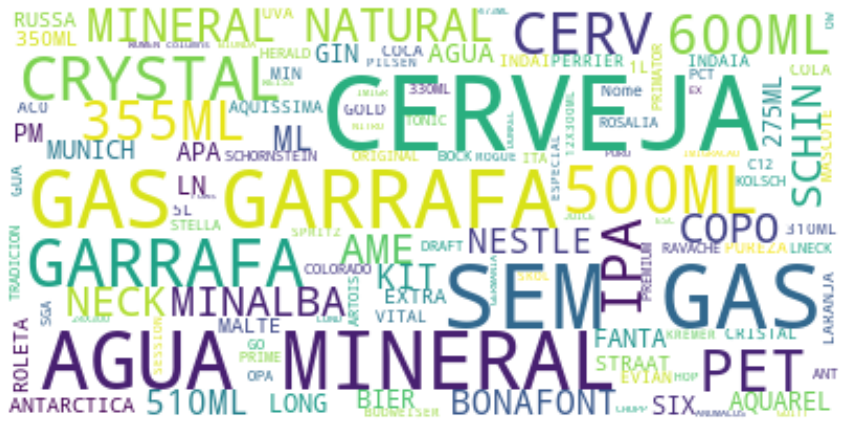

In [60]:
base.iloc[0]

text = str(base.iloc[:])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()